# Pre-Development Testing Ground
This notebook is used to test out various different codes before then attempting to integrate into application.

In [148]:
from dash import Dash, html, dcc, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
import plotly.express as px
import numpy as np
import requests

#Data Pull
Response = requests.get('https://ericfflynn.github.io/Data/HealthAutoExport.json')
data = Response.json()

df = pd.DataFrame(data['data']['workouts'])
df.drop(['humidity','stepCadence','swimCadence','stepCount','totalSwimmingStrokeCount', \
       'heartRateRecovery', 'isIndoor', 'temperature', 'flightsClimbed','speed'],axis=1,inplace=True)

df['Start'] = pd.to_datetime(df['start']).apply(lambda x: x.date())
df['End'] = pd.to_datetime(df['end']).apply(lambda x: x.date())
df['Startstr'] = df['Start'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['start'] = df['start'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S %z"))
df['end'] = df['end'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S %z"))
df['Duration'] = df['end']-df['start']
df['YearMonth'] = df['Start'].apply(lambda x: x.strftime("%m-%Y"))
df['YearWeek'] = df['start'].apply(lambda x: x.strftime("%Y-%W"))
for i in ['activeEnergy','avgHeartRate','maxHeartRate','distance','totalEnergy','intensity',]:
    df[i] = df[i].apply(lambda x: x['qty'])

In [149]:
df.columns

Index(['totalEnergy', 'activeEnergy', 'intensity', 'maxHeartRate',
       'heartRateData', 'start', 'name', 'elevation', 'distance', 'end',
       'route', 'avgHeartRate', 'Start', 'End', 'Startstr', 'Duration',
       'YearMonth', 'YearWeek'],
      dtype='object')

In [150]:
df.name.unique()

array(['Traditional Strength Training', 'Walking', 'Cycling',
       'Mixed Cardio', 'Tennis', 'Golf', 'Running', 'Hiking', 'Yoga',
       'Functional Strength Training', 'Core Training'], dtype=object)

In [77]:
metrics =  data['data']['metrics']
type(metrics)
for i in metrics:
    Name = i['name']
    Unit = i['units']
    print(Name,":",Unit)


active_energy : kcal
apple_exercise_time : min
apple_stand_hour : count
apple_stand_time : min
body_mass_index : count
cycling_distance : mi
heart_rate : count/min
resting_heart_rate : count/min
step_count : count
walking_running_distance : mi
weight_body_mass : lb


# Pull min ,max, median, mean

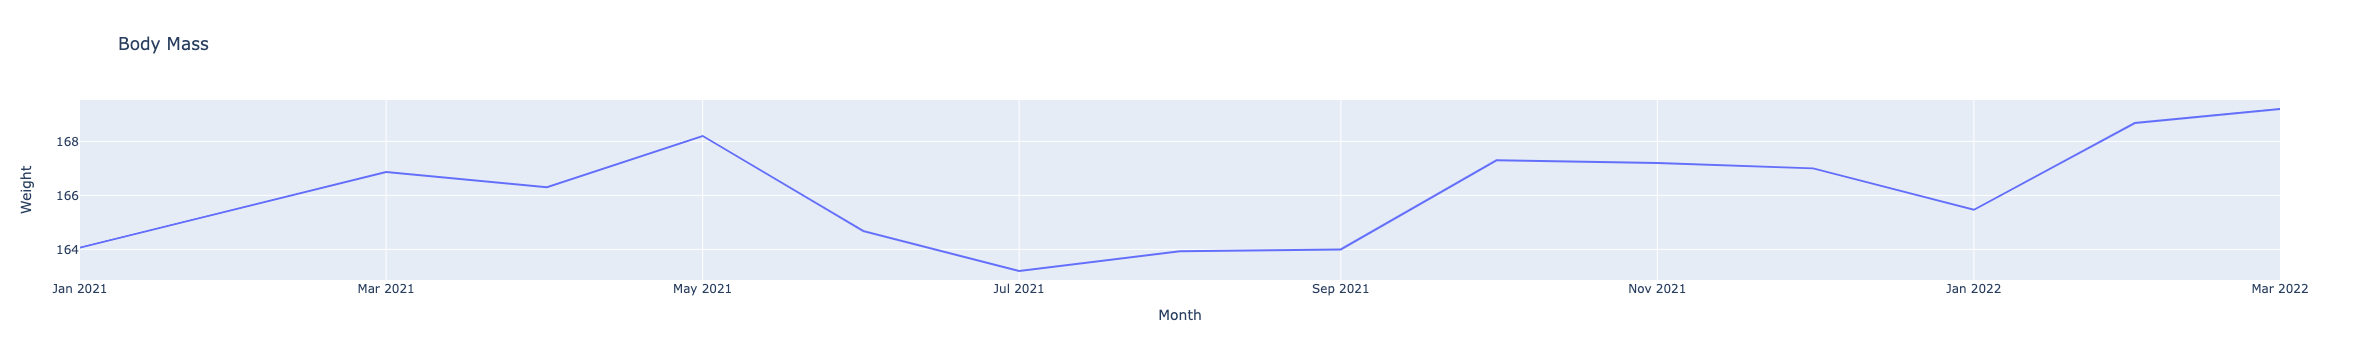

In [147]:
Weight = pd.DataFrame(metrics[10]['data'])
Weight['month'] = Weight['date'].apply(lambda x: x[0:7]) 
Weight['date'] = Weight['date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S %z"))
# Monthly = Weight.groupby(['month']).agg({'qty':['min', 'max','mean','median']}).reset_index().rename(columns={'qty':'Weight','month':'Month'})
Monthly_weight = Weight.groupby(['month']).agg({'qty':'mean'}).reset_index().rename(columns={'qty':'Weight','month':'Month'})
Monthly_weight.set_index('Month',inplace=True)

fig = px.line(Monthly_weight, x=Monthly_weight.index, y="Weight", title='Body Mass')
fig.show()

In [ ]:
runs = df.loc[df['name'] == 'Running']
runs